# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [6]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [7]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [8]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [9]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 의약품

In [10]:
# 의약품만 남기기
ap_pills = df_ap_quarter[df_ap_quarter.업종명 == '의약품'].reset_index().drop('index', axis=1)
ap_pills

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,소매,의료,의약품,압구정동,5014822272,42,1,2
1,2017-2,소매,의료,의약품,압구정동,4932899361,40,3,5
2,2017-3,소매,의료,의약품,압구정동,5084073044,41,3,2
3,2017-4,소매,의료,의약품,압구정동,4587640431,41,1,1
4,2018-1,소매,의료,의약품,압구정동,4718388783,42,1,0
5,2018-2,소매,의료,의약품,압구정동,4612051989,42,0,0
6,2018-3,소매,의료,의약품,압구정동,4578243967,43,2,1
7,2018-4,소매,의료,의약품,압구정동,4769221598,43,1,1
8,2019-1,소매,의료,의약품,압구정동,5181205181,43,1,1
9,2019-2,소매,의료,의약품,압구정동,5037255140,44,1,0


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [11]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_pills['성장성'] = ap_pills['분기당_매출_금액'] / ap_pills['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_pills['성장성'][0] = 1

ap_pills

<ipython-input-11-f408f075e836>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_pills['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,소매,의료,의약품,압구정동,5014822272,42,1,2,1.000000
1,2017-2,소매,의료,의약품,압구정동,4932899361,40,3,5,0.983664
2,2017-3,소매,의료,의약품,압구정동,5084073044,41,3,2,1.030646
3,2017-4,소매,의료,의약품,압구정동,4587640431,41,1,1,0.902355
4,2018-1,소매,의료,의약품,압구정동,4718388783,42,1,0,1.028500
5,2018-2,소매,의료,의약품,압구정동,4612051989,42,0,0,0.977463
6,2018-3,소매,의료,의약품,압구정동,4578243967,43,2,1,0.992670
7,2018-4,소매,의료,의약품,압구정동,4769221598,43,1,1,1.041714
8,2019-1,소매,의료,의약품,압구정동,5181205181,43,1,1,1.086384
9,2019-2,소매,의료,의약품,압구정동,5037255140,44,1,0,0.972217


In [12]:
# 개업률, 폐업률, 순점포증감률 추가

ap_pills['개업률'] = (ap_pills['개업점포수'] / ap_pills['총 점포수']) * 100
ap_pills['폐업률'] = (ap_pills['폐업점포수'] / ap_pills['총 점포수']) * 100
ap_pills['순점포증감률'] = ((ap_pills['개업점포수'] - ap_pills['폐업점포수']) / ap_pills['총 점포수']) * 100

ap_pills

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,소매,의료,의약품,압구정동,5014822272,42,1,2,1.000000,2.380952,4.761905,-2.380952
1,2017-2,소매,의료,의약품,압구정동,4932899361,40,3,5,0.983664,7.500000,12.500000,-5.000000
2,2017-3,소매,의료,의약품,압구정동,5084073044,41,3,2,1.030646,7.317073,4.878049,2.439024
3,2017-4,소매,의료,의약품,압구정동,4587640431,41,1,1,0.902355,2.439024,2.439024,0.000000
4,2018-1,소매,의료,의약품,압구정동,4718388783,42,1,0,1.028500,2.380952,0.000000,2.380952
5,2018-2,소매,의료,의약품,압구정동,4612051989,42,0,0,0.977463,0.000000,0.000000,0.000000
6,2018-3,소매,의료,의약품,압구정동,4578243967,43,2,1,0.992670,4.651163,2.325581,2.325581
7,2018-4,소매,의료,의약품,압구정동,4769221598,43,1,1,1.041714,2.325581,2.325581,0.000000
8,2019-1,소매,의료,의약품,압구정동,5181205181,43,1,1,1.086384,2.325581,2.325581,0.000000
9,2019-2,소매,의료,의약품,압구정동,5037255140,44,1,0,0.972217,2.272727,0.000000,2.272727


In [13]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 의약품만 남기기
gangnam_pills = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '의약품'].reset_index()

################################################################################################################################################################################################

ap_pills['시장성'] = (ap_pills['분기당_매출_금액'] / ap_pills['총 점포수']) - (gangnam_pills['분기당_매출_금액'] / gangnam_pills['총 점포수'])

ap_pills = ap_pills[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_pills

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,의약품,5014822272,1.000000,-2.380952,-5.392517e+07
1,2017-2,의약품,4932899361,0.983664,-5.000000,-5.616894e+07
2,2017-3,의약품,5084073044,1.030646,2.439024,-5.660006e+07
3,2017-4,의약품,4587640431,0.902355,0.000000,-6.774629e+07
4,2018-1,의약품,4718388783,1.028500,2.380952,-6.815145e+07
5,2018-2,의약품,4612051989,0.977463,0.000000,-6.441668e+07
6,2018-3,의약품,4578243967,0.992670,2.325581,-6.303673e+07
7,2018-4,의약품,4769221598,1.041714,0.000000,-6.408171e+07
8,2019-1,의약품,5181205181,1.086384,0.000000,-2.670614e+07
9,2019-2,의약품,5037255140,0.972217,2.272727,-2.383198e+07


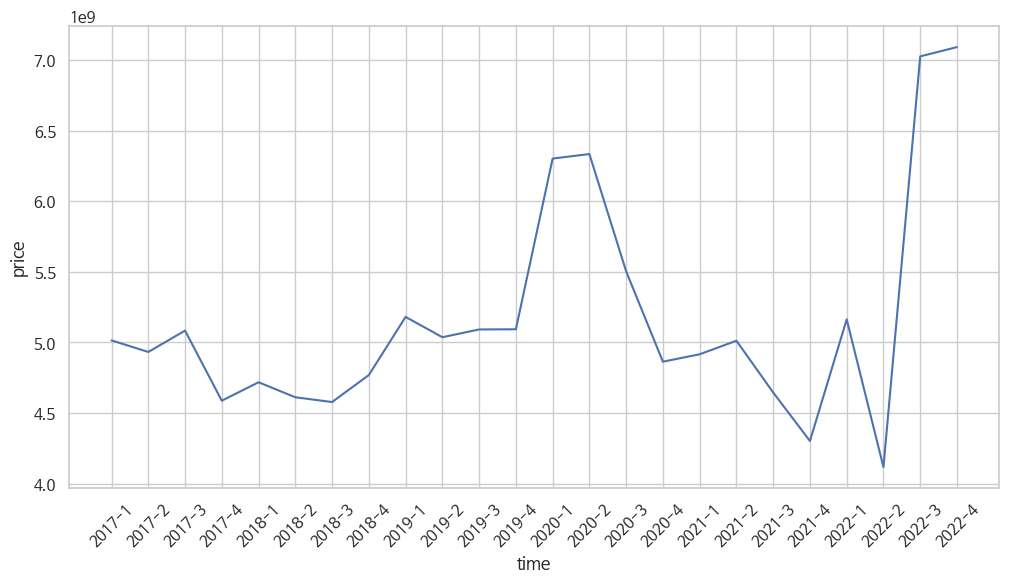

In [14]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_pills['분기'], y=ap_pills['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [15]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_pills[['성장성', '시장성', '순점포증감률']]
y = ap_pills.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -5.392517e+07 -2.380952
1   0.983664 -5.616894e+07 -5.000000
2   1.030646 -5.660006e+07  2.439024
3   0.902355 -6.774629e+07  0.000000
4   1.028500 -6.815145e+07  2.380952
5   0.977463 -6.441668e+07  0.000000
6   0.992670 -6.303673e+07  2.325581
7   1.041714 -6.408171e+07  0.000000
8   1.086384 -2.670614e+07  0.000000
9   0.972217 -2.383198e+07  2.272727
10  1.010928 -3.200423e+07  2.222222
11  1.000246 -8.632306e+07  6.250000
12  1.237329 -9.312007e+07 -2.040816
13  1.005098 -1.492156e+08  6.250000
14  0.868840 -1.323580e+08  0.000000
15  0.883774 -1.769792e+08  0.000000
16  1.010796 -1.395408e+08  0.000000
17  1.019494 -1.205829e+08  2.083333
18  0.926858 -1.281435e+08  0.000000
19  0.926129 -1.301747e+08 -2.127660
20  1.200162 -1.321809e+08  0.000000
21  0.797381 -1.521140e+08  7.843137
22  1.706411 -1.184711e+08 -2.000000
23  1.009340 -1.379610e+08  0.000000
---------------------------------------------------------------------------

In [16]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [17]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [18]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [19]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[1.         0.38203857 0.23358779]
 [0.23317009 0.25477558 0.38931298]]


In [20]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [21]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [22]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0924
Epoch 1: val_loss improved from inf to 0.21609, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.0924 - val_loss: 0.2161
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0916
Epoch 2: val_loss improved from 0.21609 to 0.21521, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.0916 - val_loss: 0.2152
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0909
Epoch 3: val_loss improved from 0.21521 to 0.21433, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.0909 - val_loss: 0.2143
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0901
Epoch 4: val_loss improved from 0.21433 to 0.21345, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.0901 - val_loss: 0.2135
Epoch 5/300
1/1 [=================

In [23]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 2s 2s/step
[[0.17929716]
 [0.17685454]
 [0.19517423]
 [0.20250103]]


In [24]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.351777,0.179297
2022-2,0.000000,0.176855
2022-3,0.977937,0.195174
2022-4,1.000000,0.202501


In [25]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_pills의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.351777,0.179297,5163788128,4.650785e+09,5.130028e+08
2022-2,0.000000,0.176855,4117506474,4.643520e+09,-5.260135e+08
2022-3,0.977937,0.195174,7026158401,4.698008e+09,2.328150e+09
2022-4,1.000000,0.202501,7091779921,4.719800e+09,2.371980e+09


In [26]:
df_test = df_test.reset_index()

### 결과

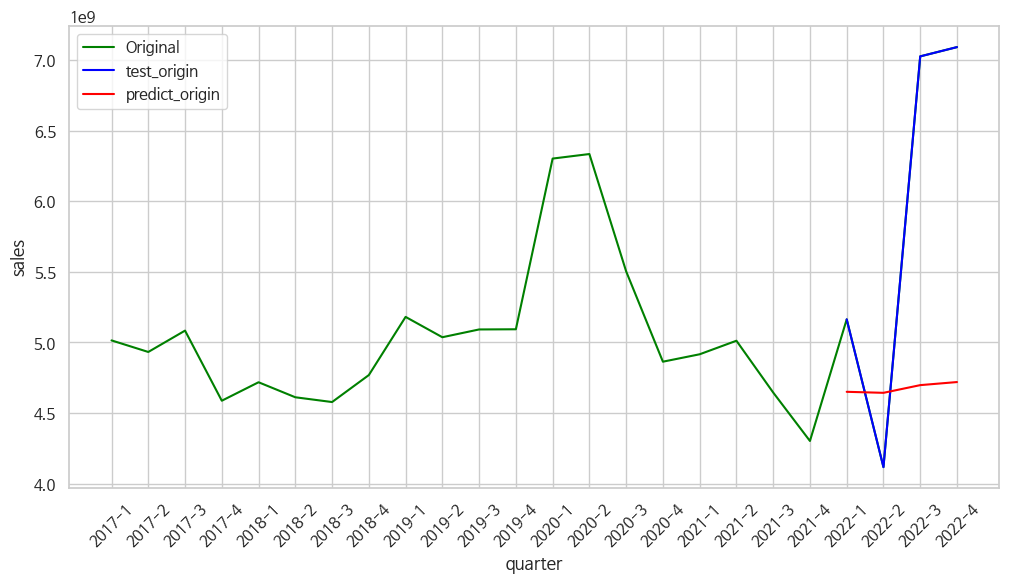

In [27]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [28]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.171780e+09
std      1.425268e+09
min     -5.260135e+08
25%      2.532488e+08
50%      1.420577e+09
75%      2.339108e+09
max      2.371980e+09
dtype: float64

In [29]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 32ms/step
[[0.19588037]]
--------------------------------------------------------------------------------
예측된 매출  : 4700108288.0 


## 23년 1분기 성장성 예측

In [30]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_pills[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_pills.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성    순점포증감률
0   5014822272 -5.392517e+07 -2.380952
1   4932899361 -5.616894e+07 -5.000000
2   5084073044 -5.660006e+07  2.439024
3   4587640431 -6.774629e+07  0.000000
4   4718388783 -6.815145e+07  2.380952
5   4612051989 -6.441668e+07  0.000000
6   4578243967 -6.303673e+07  2.325581
7   4769221598 -6.408171e+07  0.000000
8   5181205181 -2.670614e+07  0.000000
9   5037255140 -2.383198e+07  2.272727
10  5092303856 -3.200423e+07  2.222222
11  5093556939 -8.632306e+07  6.250000
12  6302405407 -9.312007e+07 -2.040816
13  6334536154 -1.492156e+08  6.250000
14  5503697277 -1.323580e+08  0.000000
15  4864025211 -1.769792e+08  0.000000
16  4916535086 -1.395408e+08  0.000000
17  5012378300 -1.205829e+08  2.083333
18  4645761996 -1.281435e+08  0.000000
19  4302575783 -1.301747e+08 -2.127660
20  5163788128 -1.321809e+08  0.000000
21  4117506474 -1.521140e+08  7.843137
22  7026158401 -1.184711e+08 -2.000000
23  7091779921 -1.379610e+08  0.000000
-------------------------

In [31]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [32]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [33]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.97793696 0.38203857 0.23358779]
 [1.         0.25477558 0.38931298]]


In [34]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [35]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0735
Epoch 1: val_loss improved from inf to 0.06783, saving model to stock_model.h5
1/1 [==============================] - 13s 13s/step - loss: 0.0735 - val_loss: 0.0678
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0728
Epoch 2: val_loss improved from 0.06783 to 0.06732, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.0728 - val_loss: 0.0673
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0721
Epoch 3: val_loss improved from 0.06732 to 0.06682, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.0721 - val_loss: 0.0668
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0714
Epoch 4: val_loss improved from 0.06682 to 0.06632, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.0714 - val_loss: 0.0663
Epoch 5/300
1/1 [==============

In [37]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 933ms/step
[[0.16400495]
 [0.15898852]
 [0.18198764]
 [0.19189754]]


In [38]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.443089,0.164005
2022-2,0.000000,0.158989
2022-3,1.000000,0.181988
2022-4,0.233170,0.191898


In [39]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 3].values       # 성장성이 ap_pills의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.443089,0.164005,1.200162,0.946466,0.253696
2022-2,0.000000,0.158989,0.797381,0.941906,-0.144525
2022-3,1.000000,0.181988,1.706411,0.962813,0.743598
2022-4,0.233170,0.191898,1.009340,0.971822,0.037518


### 결과

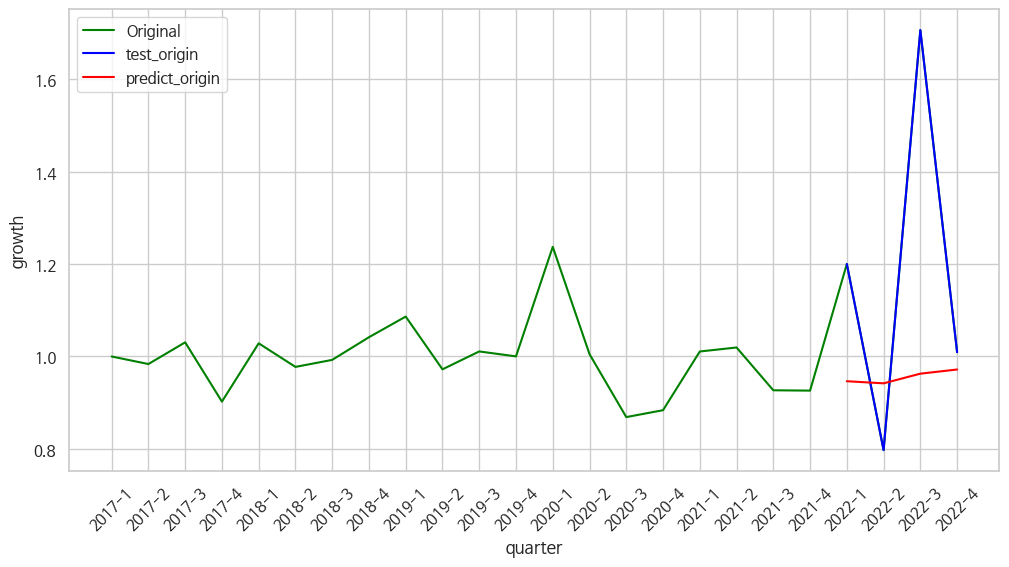

In [40]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [41]:
## error의 요약 통계량
error.describe()

count    4.000000
mean     0.222572
std      0.383598
min     -0.144525
25%     -0.007993
50%      0.145607
75%      0.376171
max      0.743598
dtype: float64

In [42]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 24ms/step
[[0.17763425]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9588558673858643 


## 23년 1분기 시장성 예측

In [43]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_pills[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_pills.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액    순점포증감률
0   1.000000  5014822272 -2.380952
1   0.983664  4932899361 -5.000000
2   1.030646  5084073044  2.439024
3   0.902355  4587640431  0.000000
4   1.028500  4718388783  2.380952
5   0.977463  4612051989  0.000000
6   0.992670  4578243967  2.325581
7   1.041714  4769221598  0.000000
8   1.086384  5181205181  0.000000
9   0.972217  5037255140  2.272727
10  1.010928  5092303856  2.222222
11  1.000246  5093556939  6.250000
12  1.237329  6302405407 -2.040816
13  1.005098  6334536154  6.250000
14  0.868840  5503697277  0.000000
15  0.883774  4864025211  0.000000
16  1.010796  4916535086  0.000000
17  1.019494  5012378300  2.083333
18  0.926858  4645761996  0.000000
19  0.926129  4302575783 -2.127660
20  1.200162  5163788128  0.000000
21  0.797381  4117506474  7.843137
22  1.706411  7026158401 -2.000000
23  1.009340  7091779921  0.000000
--------------------------------------------------------------------------------
             시장성
0  -5.392517e+07
1  -5.6168

In [44]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [45]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [46]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[1.         0.97793696 0.23358779]
 [0.23317009 1.         0.38931298]]


In [47]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [48]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.6735
Epoch 1: val_loss improved from inf to 0.11321, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.6735 - val_loss: 0.1132
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.6719
Epoch 2: val_loss improved from 0.11321 to 0.11255, saving model to stock_model.h5
1/1 [==============================] - 0s 121ms/step - loss: 0.6719 - val_loss: 0.1126
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.6704
Epoch 3: val_loss improved from 0.11255 to 0.11190, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.6704 - val_loss: 0.1119
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.6688
Epoch 4: val_loss improved from 0.11190 to 0.11125, saving model to stock_model.h5
1/1 [==============================] - 0s 102ms/step - loss: 0.6688 - val_loss: 0.1113
Epoch 5/300
1/1 [===============

In [50]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 813ms/step
[[0.211198  ]
 [0.2100732 ]
 [0.2822976 ]
 [0.31782386]]


In [51]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.292518,0.211198
2022-2,0.162362,0.210073
2022-3,0.382039,0.282298
2022-4,0.254776,0.317824


In [52]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 5].values       # 시장성이 ap_pills의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.292518,0.211198,-1.321809e+08,-144634832.0,1.245388e+07
2022-2,0.162362,0.210073,-1.521140e+08,-144807088.0,-7.306886e+06
2022-3,0.382039,0.282298,-1.184711e+08,-133746128.0,1.527506e+07
2022-4,0.254776,0.317824,-1.379610e+08,-128305376.0,-9.655672e+06


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


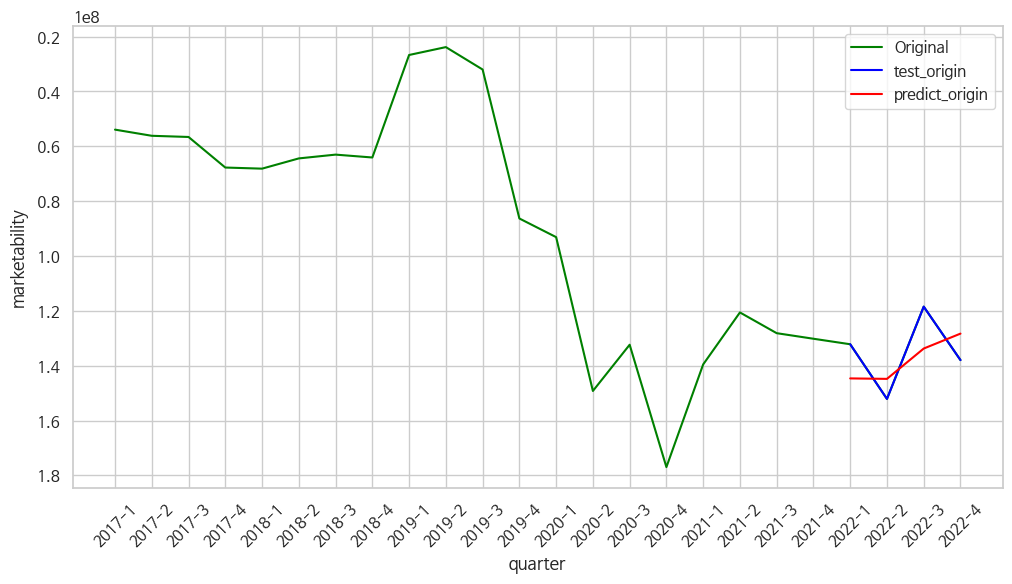

In [53]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [54]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.691595e+06
std      1.298808e+07
min     -9.655672e+06
25%     -7.894082e+06
50%      2.573498e+06
75%      1.315918e+07
max      1.527506e+07
dtype: float64

In [55]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 27ms/step
[[0.28971332]]
--------------------------------------------------------------------------------
예측된 시장성  : -132610432.0 


## 23년 1분기 순점포증감률 예측

In [56]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_pills[['성장성', '분기당_매출_금액', '시장성']]
y = ap_pills.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000  5014822272 -5.392517e+07
1   0.983664  4932899361 -5.616894e+07
2   1.030646  5084073044 -5.660006e+07
3   0.902355  4587640431 -6.774629e+07
4   1.028500  4718388783 -6.815145e+07
5   0.977463  4612051989 -6.441668e+07
6   0.992670  4578243967 -6.303673e+07
7   1.041714  4769221598 -6.408171e+07
8   1.086384  5181205181 -2.670614e+07
9   0.972217  5037255140 -2.383198e+07
10  1.010928  5092303856 -3.200423e+07
11  1.000246  5093556939 -8.632306e+07
12  1.237329  6302405407 -9.312007e+07
13  1.005098  6334536154 -1.492156e+08
14  0.868840  5503697277 -1.323580e+08
15  0.883774  4864025211 -1.769792e+08
16  1.010796  4916535086 -1.395408e+08
17  1.019494  5012378300 -1.205829e+08
18  0.926858  4645761996 -1.281435e+08
19  0.926129  4302575783 -1.301747e+08
20  1.200162  5163788128 -1.321809e+08
21  0.797381  4117506474 -1.521140e+08
22  1.706411  7026158401 -1.184711e+08
23  1.009340  7091779921 -1.379610e+08
-------------------------

In [57]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [58]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [59]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[1.         0.97793696 0.38203857]
 [0.23317009 1.         0.25477558]]


In [60]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [61]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [62]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3215
Epoch 1: val_loss improved from inf to 0.24217, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.3215 - val_loss: 0.2422
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3202
Epoch 2: val_loss improved from 0.24217 to 0.24130, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.3202 - val_loss: 0.2413
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3188
Epoch 3: val_loss improved from 0.24130 to 0.24043, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.3188 - val_loss: 0.2404
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3174
Epoch 4: val_loss improved from 0.24043 to 0.23956, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.3174 - val_loss: 0.2396
Epoch 5/300
1/1 [=================

In [63]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 852ms/step
[[0.3199387 ]
 [0.33077022]
 [0.32937503]
 [0.3313332 ]]


In [64]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.389313,0.319939
2022-2,1.000000,0.330770
2022-3,0.233588,0.329375
2022-4,0.389313,0.331333


In [65]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_pills의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.389313,0.319939,0.000000,-0.890983,0.890983
2022-2,1.000000,0.330770,7.843137,-0.751873,8.595010
2022-3,0.233588,0.329375,-2.000000,-0.769791,-1.230209
2022-4,0.389313,0.331333,0.000000,-0.744642,0.744642


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


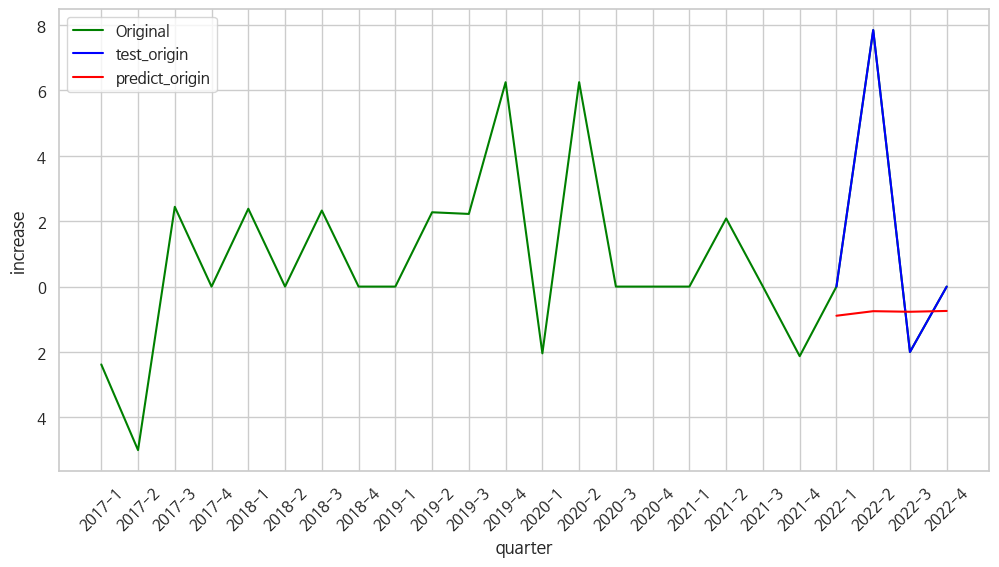

In [66]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [67]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     2.250107
std      4.339126
min     -1.230209
25%      0.250930
50%      0.817813
75%      2.816990
max      8.595010
dtype: float64

In [68]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 52ms/step
[[0.4927312]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 1.3282146453857422 


## 원본 데이터에 예측값 추가하기

In [69]:
print(sales)
print(growth)
print(marketability)
print(increase)

4700108300.0
0.95885587
-132610430.0
1.3282146


In [70]:
ap_pills.loc[24] = ['2023-1', '의약품', sales, growth, increase, marketability]

<ipython-input-70-152a1d03c633>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_pills.loc[24] = ['2023-1', '의약품', sales, growth, increase, marketability]


In [71]:
ap_pills

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,의약품,5.014822e+09,1.000000,-2.380952,-5.392517e+07
1,2017-2,의약품,4.932899e+09,0.983664,-5.000000,-5.616894e+07
2,2017-3,의약품,5.084073e+09,1.030646,2.439024,-5.660006e+07
3,2017-4,의약품,4.587640e+09,0.902355,0.000000,-6.774629e+07
4,2018-1,의약품,4.718389e+09,1.028500,2.380952,-6.815145e+07
5,2018-2,의약품,4.612052e+09,0.977463,0.000000,-6.441668e+07
6,2018-3,의약품,4.578244e+09,0.992670,2.325581,-6.303673e+07
7,2018-4,의약품,4.769222e+09,1.041714,0.000000,-6.408171e+07
8,2019-1,의약품,5.181205e+09,1.086384,0.000000,-2.670614e+07
9,2019-2,의약품,5.037255e+09,0.972217,2.272727,-2.383198e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [72]:
### X / y 데이터 생성
X = ap_pills[['성장성', '시장성', '순점포증감률']]
y = ap_pills.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -5.392517e+07 -2.380952
1   0.983664 -5.616894e+07 -5.000000
2   1.030646 -5.660006e+07  2.439024
3   0.902355 -6.774629e+07  0.000000
4   1.028500 -6.815145e+07  2.380952
5   0.977463 -6.441668e+07  0.000000
6   0.992670 -6.303673e+07  2.325581
7   1.041714 -6.408171e+07  0.000000
8   1.086384 -2.670614e+07  0.000000
9   0.972217 -2.383198e+07  2.272727
10  1.010928 -3.200423e+07  2.222222
11  1.000246 -8.632306e+07  6.250000
12  1.237329 -9.312007e+07 -2.040816
13  1.005098 -1.492156e+08  6.250000
14  0.868840 -1.323580e+08  0.000000
15  0.883774 -1.769792e+08  0.000000
16  1.010796 -1.395408e+08  0.000000
17  1.019494 -1.205829e+08  2.083333
18  0.926858 -1.281435e+08  0.000000
19  0.926129 -1.301747e+08 -2.127660
20  1.200162 -1.321809e+08  0.000000
21  0.797381 -1.521140e+08  7.843137
22  1.706411 -1.184711e+08 -2.000000
23  1.009340 -1.379610e+08  0.000000
24  0.958856 -1.326104e+08  1.328215
--------------------------------------

In [73]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [74]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.23317009 0.25477558 0.38931298]
 [0.17763426 0.28971331 0.49273122]]


In [75]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [76]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [77]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1385
Epoch 1: val_loss improved from inf to 0.15832, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.1385 - val_loss: 0.1583
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1376
Epoch 2: val_loss improved from 0.15832 to 0.15761, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.1376 - val_loss: 0.1576
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1368
Epoch 3: val_loss improved from 0.15761 to 0.15692, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.1368 - val_loss: 0.1569
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1359
Epoch 4: val_loss improved from 0.15692 to 0.15622, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.1359 - val_loss: 0.1562
Epoch 5/300
1/1 [=================

In [78]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.20701043]
 [0.24747737]
 [0.26282746]
 [0.22227734]]


In [79]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.000000,0.207010
2022-3,0.977937,0.247477
2022-4,1.000000,0.262827
2023-1,0.195880,0.222277


In [80]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_pills의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.000000,0.207010,4.117506e+09,4.733212e+09,-6.157057e+08
2022-3,0.977937,0.247477,7.026158e+09,4.853572e+09,2.172587e+09
2022-4,1.000000,0.262827,7.091780e+09,4.899227e+09,2.192553e+09
2023-1,0.195880,0.222277,4.700108e+09,4.778620e+09,-7.851162e+07


In [81]:
df_test = df_test.reset_index()

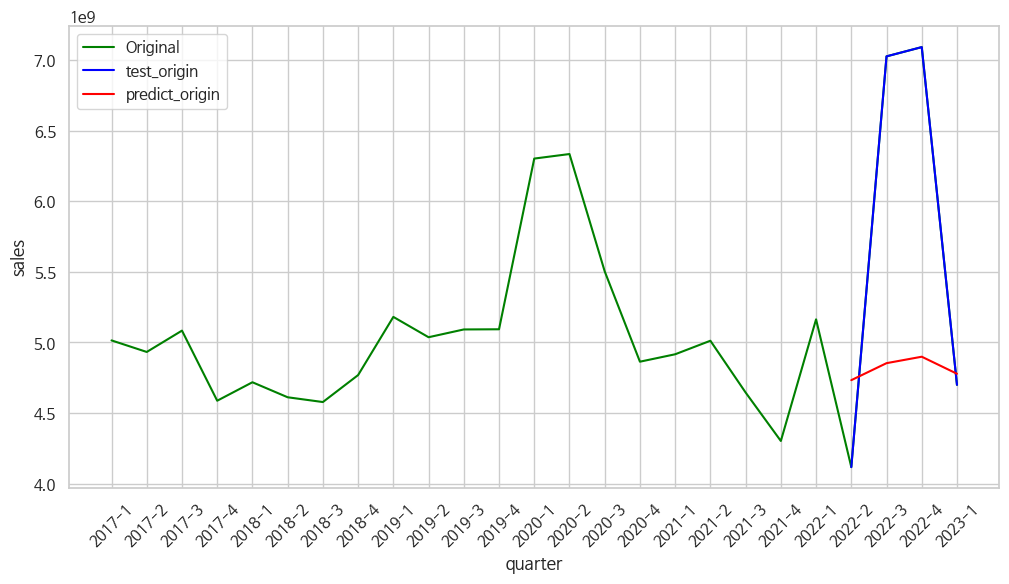

In [82]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [83]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     9.177306e+08
std      1.476907e+09
min     -6.157057e+08
25%     -2.128101e+08
50%      1.047038e+09
75%      2.177578e+09
max      2.192553e+09
dtype: float64

In [84]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 31ms/step
[[0.22195236]]
--------------------------------------------------------------------------------
예측된 매출  : 4777653248.0 


### 성장성

In [85]:
### X / y 데이터 생성
X = ap_pills[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_pills.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   5.014822e+09 -5.392517e+07 -2.380952
1   4.932899e+09 -5.616894e+07 -5.000000
2   5.084073e+09 -5.660006e+07  2.439024
3   4.587640e+09 -6.774629e+07  0.000000
4   4.718389e+09 -6.815145e+07  2.380952
5   4.612052e+09 -6.441668e+07  0.000000
6   4.578244e+09 -6.303673e+07  2.325581
7   4.769222e+09 -6.408171e+07  0.000000
8   5.181205e+09 -2.670614e+07  0.000000
9   5.037255e+09 -2.383198e+07  2.272727
10  5.092304e+09 -3.200423e+07  2.222222
11  5.093557e+09 -8.632306e+07  6.250000
12  6.302405e+09 -9.312007e+07 -2.040816
13  6.334536e+09 -1.492156e+08  6.250000
14  5.503697e+09 -1.323580e+08  0.000000
15  4.864025e+09 -1.769792e+08  0.000000
16  4.916535e+09 -1.395408e+08  0.000000
17  5.012378e+09 -1.205829e+08  2.083333
18  4.645762e+09 -1.281435e+08  0.000000
19  4.302576e+09 -1.301747e+08 -2.127660
20  5.163788e+09 -1.321809e+08  0.000000
21  4.117506e+09 -1.521140e+08  7.843137
22  7.026158e+09 -1.184711e+08 -2.000000
23  7.091780e+09

In [86]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [87]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[1.         0.25477558 0.38931298]
 [0.19588038 0.28971331 0.49273122]]


In [88]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [89]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [90]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0918
Epoch 1: val_loss improved from inf to 0.06002, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.0918 - val_loss: 0.0600
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0910
Epoch 2: val_loss improved from 0.06002 to 0.05959, saving model to stock_model.h5
1/1 [==============================] - 0s 164ms/step - loss: 0.0910 - val_loss: 0.0596
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0903
Epoch 3: val_loss improved from 0.05959 to 0.05917, saving model to stock_model.h5
1/1 [==============================] - 0s 153ms/step - loss: 0.0903 - val_loss: 0.0592
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0895
Epoch 4: val_loss improved from 0.05917 to 0.05875, saving model to stock_model.h5
1/1 [==============================] - 0s 142ms/step - loss: 0.0895 - val_loss: 0.0588
Epoch 5/300
1/1 [==============

In [91]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.16176516]
 [0.19036564]
 [0.2012417 ]
 [0.18284605]]


In [92]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.000000,0.161765
2022-3,1.000000,0.190366
2022-4,0.233170,0.201242
2023-1,0.177634,0.182846


In [93]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 3].values       # 성장성이 ap_pills의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.000000,0.161765,0.797381,0.944430,-0.147049
2022-3,1.000000,0.190366,1.706411,0.970429,0.735982
2022-4,0.233170,0.201242,1.009340,0.980316,0.029024
2023-1,0.177634,0.182846,0.958856,0.963594,-0.004738


In [94]:
df_test = df_test.reset_index()

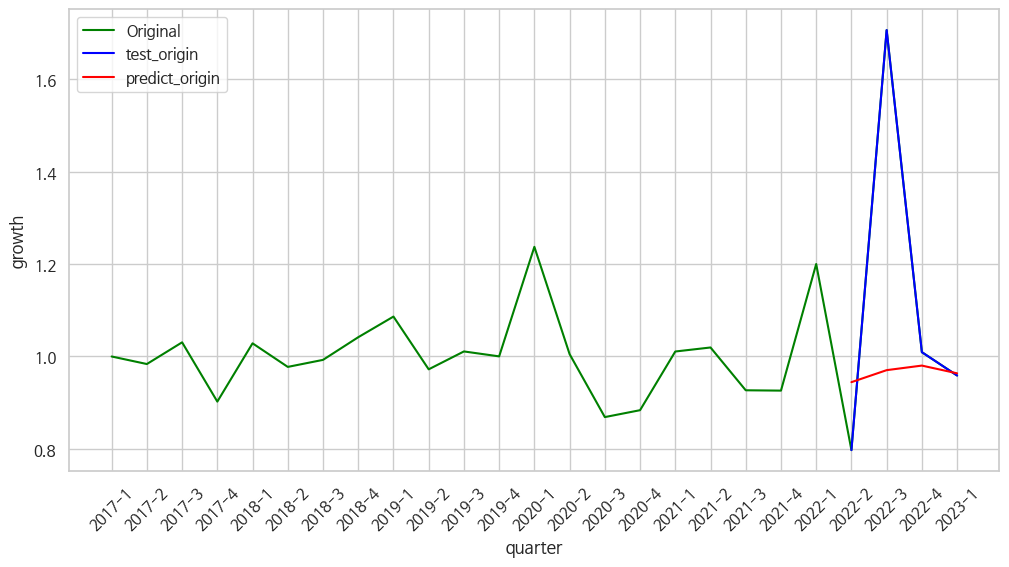

In [95]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [96]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.153305
std      0.395874
min     -0.147049
25%     -0.040316
50%      0.012143
75%      0.205763
max      0.735982
dtype: float64

In [97]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 44ms/step
[[0.18393835]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9645864963531494 


### 시장성

In [98]:
### X / y 데이터 생성
X = ap_pills[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_pills.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   5.014822e+09  1.000000 -2.380952
1   4.932899e+09  0.983664 -5.000000
2   5.084073e+09  1.030646  2.439024
3   4.587640e+09  0.902355  0.000000
4   4.718389e+09  1.028500  2.380952
5   4.612052e+09  0.977463  0.000000
6   4.578244e+09  0.992670  2.325581
7   4.769222e+09  1.041714  0.000000
8   5.181205e+09  1.086384  0.000000
9   5.037255e+09  0.972217  2.272727
10  5.092304e+09  1.010928  2.222222
11  5.093557e+09  1.000246  6.250000
12  6.302405e+09  1.237329 -2.040816
13  6.334536e+09  1.005098  6.250000
14  5.503697e+09  0.868840  0.000000
15  4.864025e+09  0.883774  0.000000
16  4.916535e+09  1.010796  0.000000
17  5.012378e+09  1.019494  2.083333
18  4.645762e+09  0.926858  0.000000
19  4.302576e+09  0.926129 -2.127660
20  5.163788e+09  1.200162  0.000000
21  4.117506e+09  0.797381  7.843137
22  7.026158e+09  1.706411 -2.000000
23  7.091780e+09  1.009340  0.000000
24  4.700108e+09  0.958856  1.328215
--------------------------------------

In [99]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [100]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[1.         0.23317009 0.38931298]
 [0.19588038 0.17763426 0.49273122]]


In [101]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [102]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [103]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.6404
Epoch 1: val_loss improved from inf to 0.08181, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.6404 - val_loss: 0.0818
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.6389
Epoch 2: val_loss improved from 0.08181 to 0.08128, saving model to stock_model.h5
1/1 [==============================] - 0s 136ms/step - loss: 0.6389 - val_loss: 0.0813
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.6374
Epoch 3: val_loss improved from 0.08128 to 0.08075, saving model to stock_model.h5
1/1 [==============================] - 0s 111ms/step - loss: 0.6374 - val_loss: 0.0807
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.6358
Epoch 4: val_loss improved from 0.08075 to 0.08022, saving model to stock_model.h5
1/1 [==============================] - 0s 124ms/step - loss: 0.6358 - val_loss: 0.0802
Epoch 5/300
1/1 [==============

In [104]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 853ms/step
[[0.17707975]
 [0.2389705 ]
 [0.26939374]
 [0.25331596]]


In [105]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.162362,0.177080
2022-3,0.382039,0.238971
2022-4,0.254776,0.269394
2023-1,0.289713,0.253316


In [106]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 5].values       # 시장성이 ap_pills의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.162362,0.177080,-1.521140e+08,-149859952.0,-2.254022e+06
2022-3,0.382039,0.238971,-1.184711e+08,-140381552.0,2.191048e+07
2022-4,0.254776,0.269394,-1.379610e+08,-135722320.0,-2.238728e+06
2023-1,0.289713,0.253316,-1.326104e+08,-138184576.0,5.574144e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


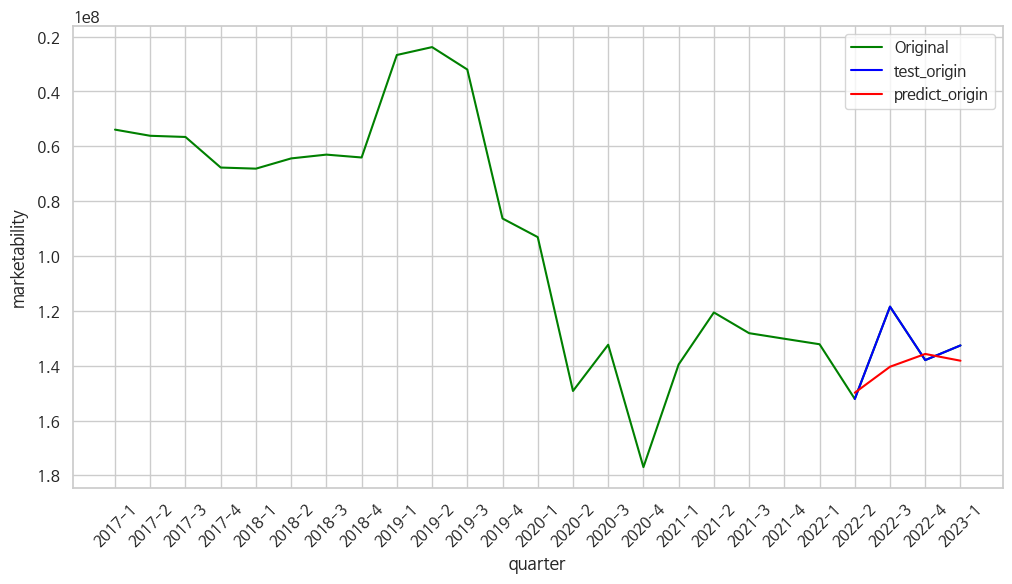

In [107]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [108]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     5.747968e+06
std      1.138824e+07
min     -2.254022e+06
25%     -2.242551e+06
50%      1.667708e+06
75%      9.658228e+06
max      2.191048e+07
dtype: float64

In [109]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 24ms/step
[[0.24239339]]
--------------------------------------------------------------------------------
예측된 시장성  : -139857344.0 


### 순점포증감률

In [110]:
### X / y 데이터 생성
X = ap_pills[['분기당_매출_금액', '성장성', '시장성']]
y = ap_pills.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   5.014822e+09  1.000000 -5.392517e+07
1   4.932899e+09  0.983664 -5.616894e+07
2   5.084073e+09  1.030646 -5.660006e+07
3   4.587640e+09  0.902355 -6.774629e+07
4   4.718389e+09  1.028500 -6.815145e+07
5   4.612052e+09  0.977463 -6.441668e+07
6   4.578244e+09  0.992670 -6.303673e+07
7   4.769222e+09  1.041714 -6.408171e+07
8   5.181205e+09  1.086384 -2.670614e+07
9   5.037255e+09  0.972217 -2.383198e+07
10  5.092304e+09  1.010928 -3.200423e+07
11  5.093557e+09  1.000246 -8.632306e+07
12  6.302405e+09  1.237329 -9.312007e+07
13  6.334536e+09  1.005098 -1.492156e+08
14  5.503697e+09  0.868840 -1.323580e+08
15  4.864025e+09  0.883774 -1.769792e+08
16  4.916535e+09  1.010796 -1.395408e+08
17  5.012378e+09  1.019494 -1.205829e+08
18  4.645762e+09  0.926858 -1.281435e+08
19  4.302576e+09  0.926129 -1.301747e+08
20  5.163788e+09  1.200162 -1.321809e+08
21  4.117506e+09  0.797381 -1.521140e+08
22  7.026158e+09  1.706411 -1.184711e+08
23  7.091780e+09

In [111]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [112]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[1.         0.23317009 0.25477558]
 [0.19588038 0.17763426 0.28971331]]


In [113]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [114]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [115]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2970
Epoch 1: val_loss improved from inf to 0.24835, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.2970 - val_loss: 0.2483
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2957
Epoch 2: val_loss improved from 0.24835 to 0.24748, saving model to stock_model.h5
1/1 [==============================] - 0s 117ms/step - loss: 0.2957 - val_loss: 0.2475
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2944
Epoch 3: val_loss improved from 0.24748 to 0.24662, saving model to stock_model.h5
1/1 [==============================] - 0s 111ms/step - loss: 0.2944 - val_loss: 0.2466
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2931
Epoch 4: val_loss improved from 0.24662 to 0.24576, saving model to stock_model.h5
1/1 [==============================] - 0s 110ms/step - loss: 0.2931 - val_loss: 0.2458
Epoch 5/300
1/1 [==============

In [116]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.30776262]
 [0.30736098]
 [0.31311297]
 [0.4771403 ]]


In [117]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,1.000000,0.307763
2022-3,0.233588,0.307361
2022-4,0.389313,0.313113
2023-1,0.492731,0.477140


In [118]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_pills의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,1.000000,0.307763,7.843137,-1.047362,8.890500
2022-3,0.233588,0.307361,-2.000000,-1.052521,-0.947479
2022-4,0.389313,0.313113,0.000000,-0.978647,0.978647
2023-1,0.492731,0.477140,1.328215,1.127978,0.200236


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


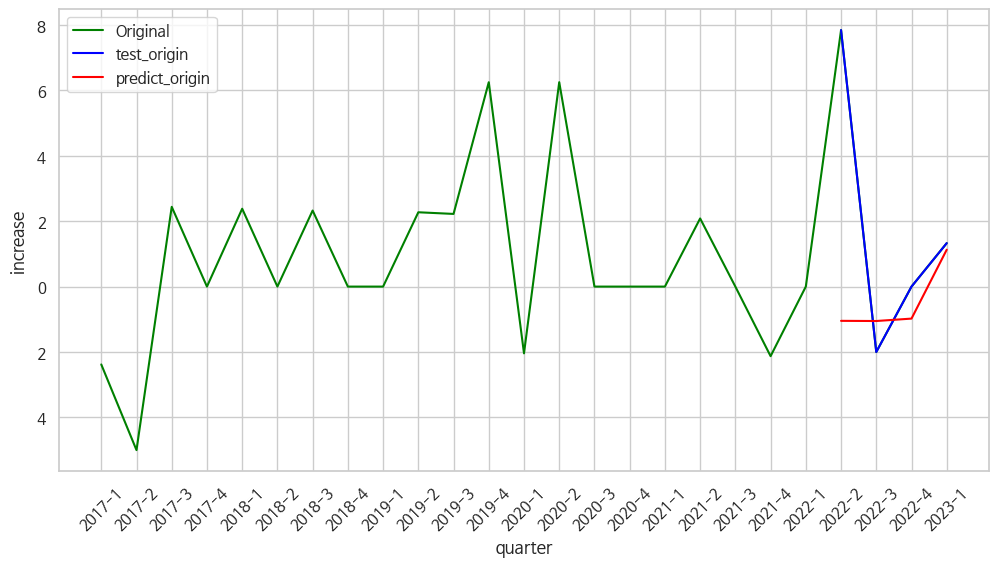

In [119]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [120]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     2.280476
std      4.477137
min     -0.947479
25%     -0.086693
50%      0.589442
75%      2.956610
max      8.890500
dtype: float64

In [121]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 23ms/step
[[0.37674075]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.1614667922258377 


### 추가


In [122]:
ap_pills.loc[25] = ['2023-2', '의약품', sales, growth, increase, marketability]

<ipython-input-122-71d5e3725667>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_pills.loc[25] = ['2023-2', '의약품', sales, growth, increase, marketability]


In [123]:
ap_pills

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,의약품,5.014822e+09,1.000000,-2.380952,-5.392517e+07
1,2017-2,의약품,4.932899e+09,0.983664,-5.000000,-5.616894e+07
2,2017-3,의약품,5.084073e+09,1.030646,2.439024,-5.660006e+07
3,2017-4,의약품,4.587640e+09,0.902355,0.000000,-6.774629e+07
4,2018-1,의약품,4.718389e+09,1.028500,2.380952,-6.815145e+07
5,2018-2,의약품,4.612052e+09,0.977463,0.000000,-6.441668e+07
6,2018-3,의약품,4.578244e+09,0.992670,2.325581,-6.303673e+07
7,2018-4,의약품,4.769222e+09,1.041714,0.000000,-6.408171e+07
8,2019-1,의약품,5.181205e+09,1.086384,0.000000,-2.670614e+07
9,2019-2,의약품,5.037255e+09,0.972217,2.272727,-2.383198e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [124]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_pills[['성장성', '시장성', '순점포증감률']]
y = ap_pills.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -5.392517e+07 -2.380952
1   0.983664 -5.616894e+07 -5.000000
2   1.030646 -5.660006e+07  2.439024
3   0.902355 -6.774629e+07  0.000000
4   1.028500 -6.815145e+07  2.380952
5   0.977463 -6.441668e+07  0.000000
6   0.992670 -6.303673e+07  2.325581
7   1.041714 -6.408171e+07  0.000000
8   1.086384 -2.670614e+07  0.000000
9   0.972217 -2.383198e+07  2.272727
10  1.010928 -3.200423e+07  2.222222
11  1.000246 -8.632306e+07  6.250000
12  1.237329 -9.312007e+07 -2.040816
13  1.005098 -1.492156e+08  6.250000
14  0.868840 -1.323580e+08  0.000000
15  0.883774 -1.769792e+08  0.000000
16  1.010796 -1.395408e+08  0.000000
17  1.019494 -1.205829e+08  2.083333
18  0.926858 -1.281435e+08  0.000000
19  0.926129 -1.301747e+08 -2.127660
20  1.200162 -1.321809e+08  0.000000
21  0.797381 -1.521140e+08  7.843137
22  1.706411 -1.184711e+08 -2.000000
23  1.009340 -1.379610e+08  0.000000
24  0.958856 -1.326104e+08  1.328215
25  0.964586 -1.398573e+08 -0.161467
-

In [125]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [126]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.17763426 0.28971331 0.49273122]
 [0.18393838 0.24239341 0.37674075]]


In [127]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [128]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [129]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1774
Epoch 1: val_loss improved from inf to 0.08300, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1774 - val_loss: 0.0830
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1764
Epoch 2: val_loss improved from 0.08300 to 0.08253, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.1764 - val_loss: 0.0825
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1754
Epoch 3: val_loss improved from 0.08253 to 0.08207, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.1754 - val_loss: 0.0821
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1745
Epoch 4: val_loss improved from 0.08207 to 0.08161, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.1745 - val_loss: 0.0816
Epoch 5/300
1/1 [=================

In [130]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 824ms/step
[[0.26074576]
 [0.28061345]
 [0.23712349]
 [0.23201582]]


In [131]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.977937,0.260746
2022-4,1.000000,0.280613
2023-1,0.195880,0.237123
2023-2,0.221952,0.232016


In [132]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_pills의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.977937,0.260746,7.026158e+09,4.893036e+09,2.133123e+09
2022-4,1.000000,0.280613,7.091780e+09,4.952127e+09,2.139652e+09
2023-1,0.195880,0.237123,4.700108e+09,4.822777e+09,-1.226685e+08
2023-2,0.221952,0.232016,4.777653e+09,4.807585e+09,-2.993203e+07


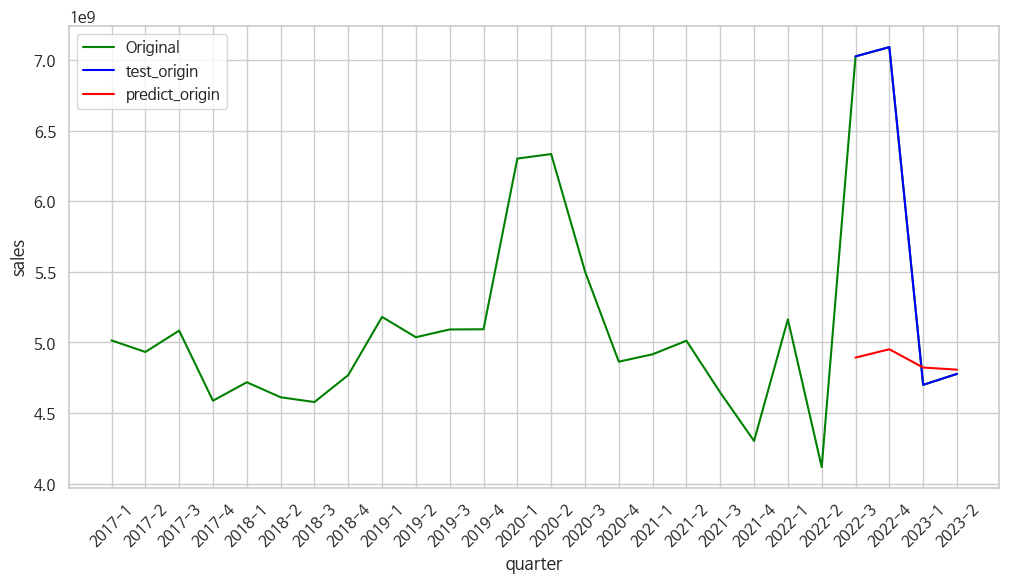

In [133]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [134]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.030044e+09
std      1.278060e+09
min     -1.226685e+08
25%     -5.311616e+07
50%      1.051595e+09
75%      2.134755e+09
max      2.139652e+09
dtype: float64

In [135]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 38ms/step
[[0.23619357]]
--------------------------------------------------------------------------------
예측된 매출  : 4820010496.0 


### 성장성

In [136]:
X = ap_pills[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_pills.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   5.014822e+09 -5.392517e+07 -2.380952
1   4.932899e+09 -5.616894e+07 -5.000000
2   5.084073e+09 -5.660006e+07  2.439024
3   4.587640e+09 -6.774629e+07  0.000000
4   4.718389e+09 -6.815145e+07  2.380952
5   4.612052e+09 -6.441668e+07  0.000000
6   4.578244e+09 -6.303673e+07  2.325581
7   4.769222e+09 -6.408171e+07  0.000000
8   5.181205e+09 -2.670614e+07  0.000000
9   5.037255e+09 -2.383198e+07  2.272727
10  5.092304e+09 -3.200423e+07  2.222222
11  5.093557e+09 -8.632306e+07  6.250000
12  6.302405e+09 -9.312007e+07 -2.040816
13  6.334536e+09 -1.492156e+08  6.250000
14  5.503697e+09 -1.323580e+08  0.000000
15  4.864025e+09 -1.769792e+08  0.000000
16  4.916535e+09 -1.395408e+08  0.000000
17  5.012378e+09 -1.205829e+08  2.083333
18  4.645762e+09 -1.281435e+08  0.000000
19  4.302576e+09 -1.301747e+08 -2.127660
20  5.163788e+09 -1.321809e+08  0.000000
21  4.117506e+09 -1.521140e+08  7.843137
22  7.026158e+09 -1.184711e+08 -2.000000
23  7.091780e+09

In [137]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [138]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.19588038 0.28971331 0.49273122]
 [0.22195228 0.24239341 0.37674075]]


In [139]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [140]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [141]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0899
Epoch 1: val_loss improved from inf to 0.05156, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.0899 - val_loss: 0.0516
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0891
Epoch 2: val_loss improved from 0.05156 to 0.05122, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.0891 - val_loss: 0.0512
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0884
Epoch 3: val_loss improved from 0.05122 to 0.05087, saving model to stock_model.h5
1/1 [==============================] - 0s 102ms/step - loss: 0.0884 - val_loss: 0.0509
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0876
Epoch 4: val_loss improved from 0.05087 to 0.05053, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.0876 - val_loss: 0.0505
Epoch 5/300
1/1 [================

In [142]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.17388795]
 [0.1839813 ]
 [0.16701305]
 [0.16827291]]


In [143]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,1.000000,0.173888
2022-4,0.233170,0.183981
2023-1,0.177634,0.167013
2023-2,0.183938,0.168273


In [144]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 3].values       # 성장성이 ap_pills의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,1.000000,0.173888,1.706411,0.955450,0.750961
2022-4,0.233170,0.183981,1.009340,0.964626,0.044714
2023-1,0.177634,0.167013,0.958856,0.949201,0.009655
2023-2,0.183938,0.168273,0.964586,0.950346,0.014240


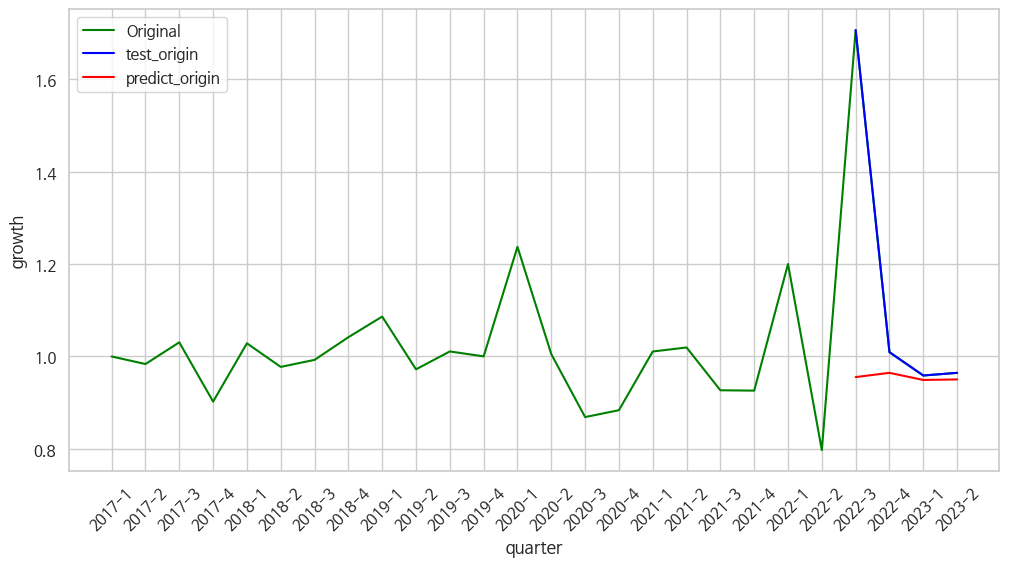

In [145]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [146]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.204893
std      0.364378
min      0.009655
25%      0.013094
50%      0.029477
75%      0.221276
max      0.750961
dtype: float64

In [147]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 37ms/step
[[0.16100118]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9437358975410461 


### 시장성

In [148]:
### X / y 데이터 생성
X = ap_pills[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_pills.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   5.014822e+09  1.000000 -2.380952
1   4.932899e+09  0.983664 -5.000000
2   5.084073e+09  1.030646  2.439024
3   4.587640e+09  0.902355  0.000000
4   4.718389e+09  1.028500  2.380952
5   4.612052e+09  0.977463  0.000000
6   4.578244e+09  0.992670  2.325581
7   4.769222e+09  1.041714  0.000000
8   5.181205e+09  1.086384  0.000000
9   5.037255e+09  0.972217  2.272727
10  5.092304e+09  1.010928  2.222222
11  5.093557e+09  1.000246  6.250000
12  6.302405e+09  1.237329 -2.040816
13  6.334536e+09  1.005098  6.250000
14  5.503697e+09  0.868840  0.000000
15  4.864025e+09  0.883774  0.000000
16  4.916535e+09  1.010796  0.000000
17  5.012378e+09  1.019494  2.083333
18  4.645762e+09  0.926858  0.000000
19  4.302576e+09  0.926129 -2.127660
20  5.163788e+09  1.200162  0.000000
21  4.117506e+09  0.797381  7.843137
22  7.026158e+09  1.706411 -2.000000
23  7.091780e+09  1.009340  0.000000
24  4.700108e+09  0.958856  1.328215
25  4.777653e+09  0.964586 -0.161467
-

In [149]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [150]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.19588038 0.17763426 0.49273122]
 [0.22195228 0.18393838 0.37674075]]


In [151]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [152]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [153]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.5906
Epoch 1: val_loss improved from inf to 0.08052, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.5906 - val_loss: 0.0805
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.5891
Epoch 2: val_loss improved from 0.08052 to 0.08001, saving model to stock_model.h5
1/1 [==============================] - 0s 258ms/step - loss: 0.5891 - val_loss: 0.0800
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.5877
Epoch 3: val_loss improved from 0.08001 to 0.07950, saving model to stock_model.h5
1/1 [==============================] - 0s 241ms/step - loss: 0.5877 - val_loss: 0.0795
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.5862
Epoch 4: val_loss improved from 0.07950 to 0.07899, saving model to stock_model.h5
1/1 [==============================] - 0s 198ms/step - loss: 0.5862 - val_loss: 0.0790
Epoch 5/300
1/1 [==============

In [154]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 817ms/step
[[0.25148442]
 [0.2841986 ]
 [0.26827466]
 [0.25557837]]


In [155]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.382039,0.251484
2022-4,0.254776,0.284199
2023-1,0.289713,0.268275
2023-2,0.242393,0.255578


In [156]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 5].values       # 시장성이 ap_pills의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.382039,0.251484,-1.184711e+08,-138465072.0,1.999400e+07
2022-4,0.254776,0.284199,-1.379610e+08,-133454992.0,-4.506056e+06
2023-1,0.289713,0.268275,-1.326104e+08,-135893696.0,3.283264e+06
2023-2,0.242393,0.255578,-1.398573e+08,-137838096.0,-2.019248e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


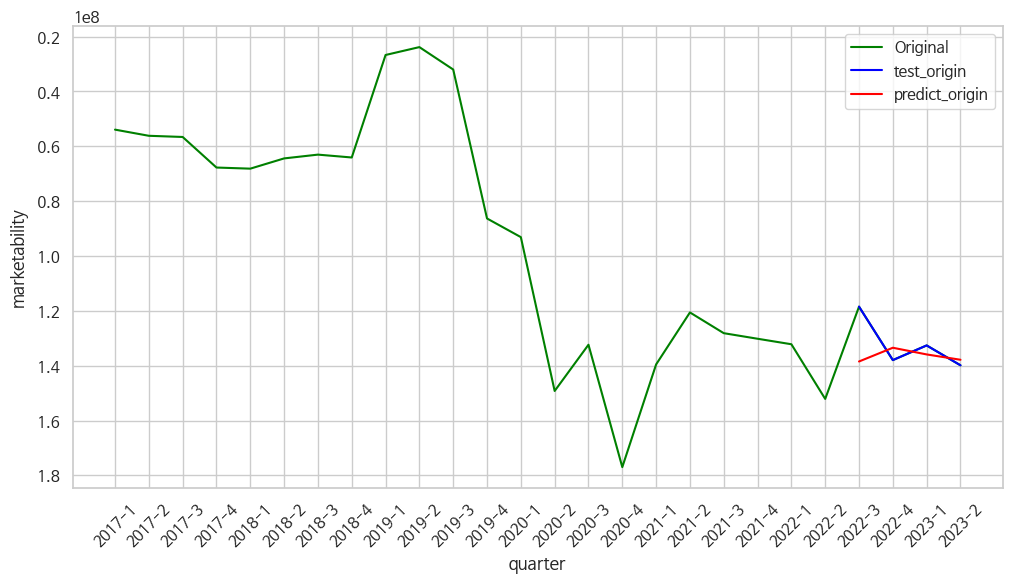

In [157]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [158]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.187990e+06
std      1.102671e+07
min     -4.506056e+06
25%     -2.640950e+06
50%      6.320080e+05
75%      7.460948e+06
max      1.999400e+07
dtype: float64

In [159]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 23ms/step
[[0.21828474]]
--------------------------------------------------------------------------------
예측된 시장성  : -143549520.0 


### 순점포증감률

In [160]:
### X / y 데이터 생성
X = ap_pills[['분기당_매출_금액', '성장성', '시장성']]
y = ap_pills.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   5.014822e+09  1.000000 -5.392517e+07
1   4.932899e+09  0.983664 -5.616894e+07
2   5.084073e+09  1.030646 -5.660006e+07
3   4.587640e+09  0.902355 -6.774629e+07
4   4.718389e+09  1.028500 -6.815145e+07
5   4.612052e+09  0.977463 -6.441668e+07
6   4.578244e+09  0.992670 -6.303673e+07
7   4.769222e+09  1.041714 -6.408171e+07
8   5.181205e+09  1.086384 -2.670614e+07
9   5.037255e+09  0.972217 -2.383198e+07
10  5.092304e+09  1.010928 -3.200423e+07
11  5.093557e+09  1.000246 -8.632306e+07
12  6.302405e+09  1.237329 -9.312007e+07
13  6.334536e+09  1.005098 -1.492156e+08
14  5.503697e+09  0.868840 -1.323580e+08
15  4.864025e+09  0.883774 -1.769792e+08
16  4.916535e+09  1.010796 -1.395408e+08
17  5.012378e+09  1.019494 -1.205829e+08
18  4.645762e+09  0.926858 -1.281435e+08
19  4.302576e+09  0.926129 -1.301747e+08
20  5.163788e+09  1.200162 -1.321809e+08
21  4.117506e+09  0.797381 -1.521140e+08
22  7.026158e+09  1.706411 -1.184711e+08
23  7.091780e+09

In [161]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [162]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.19588038 0.17763426 0.28971331]
 [0.22195228 0.18393838 0.24239341]]


In [163]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [164]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [165]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3395
Epoch 1: val_loss improved from inf to 0.27632, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3395 - val_loss: 0.2763
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3381
Epoch 2: val_loss improved from 0.27632 to 0.27549, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.3381 - val_loss: 0.2755
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3368
Epoch 3: val_loss improved from 0.27549 to 0.27466, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.3368 - val_loss: 0.2747
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3354
Epoch 4: val_loss improved from 0.27466 to 0.27384, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.3354 - val_loss: 0.2738
Epoch 5/300
1/1 [=================

In [166]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 786ms/step
[[0.32746094]
 [0.33530033]
 [0.52158767]
 [0.40715277]]


In [167]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.233588,0.327461
2022-4,0.389313,0.335300
2023-1,0.492731,0.521588
2023-2,0.376741,0.407153


In [168]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_pills의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.233588,0.327461,-2.000000,-0.794374,-1.205626
2022-4,0.389313,0.335300,0.000000,-0.693692,0.693692
2023-1,0.492731,0.521588,1.328215,1.698822,-0.370607
2023-2,0.376741,0.407153,-0.161467,0.229119,-0.390586


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


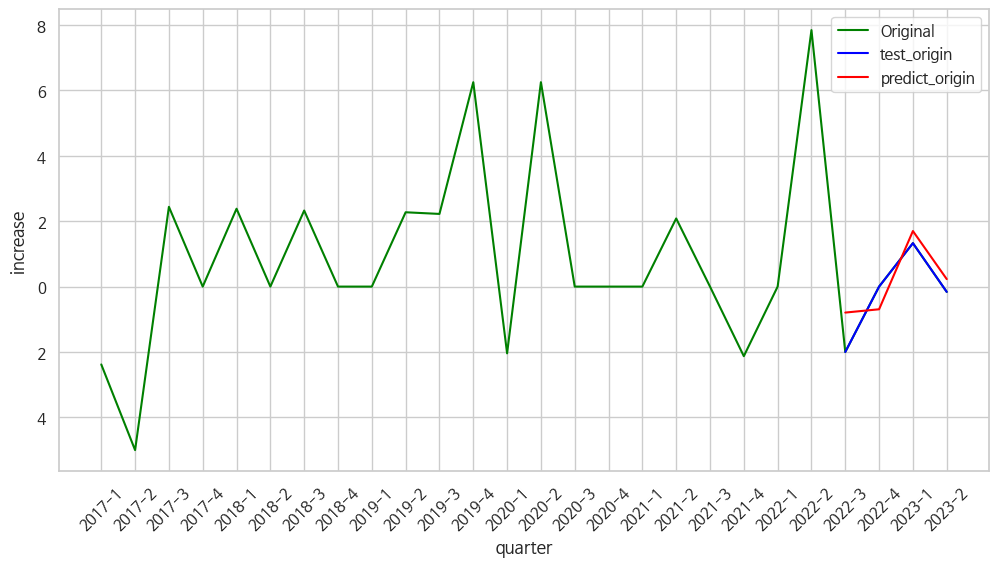

In [169]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [170]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.318282
std      0.778767
min     -1.205626
25%     -0.594346
50%     -0.380597
75%     -0.104533
max      0.693692
dtype: float64

In [171]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 23ms/step
[[0.3209542]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.8779410719871521 


### 추가

In [172]:
ap_pills.loc[26] = ['2023-3', '의약품', sales, growth, increase, marketability]

<ipython-input-172-b20707953e12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_pills.loc[26] = ['2023-3', '의약품', sales, growth, increase, marketability]


In [173]:
ap_pills

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,의약품,5.014822e+09,1.000000,-2.380952,-5.392517e+07
1,2017-2,의약품,4.932899e+09,0.983664,-5.000000,-5.616894e+07
2,2017-3,의약품,5.084073e+09,1.030646,2.439024,-5.660006e+07
3,2017-4,의약품,4.587640e+09,0.902355,0.000000,-6.774629e+07
4,2018-1,의약품,4.718389e+09,1.028500,2.380952,-6.815145e+07
5,2018-2,의약품,4.612052e+09,0.977463,0.000000,-6.441668e+07
6,2018-3,의약품,4.578244e+09,0.992670,2.325581,-6.303673e+07
7,2018-4,의약품,4.769222e+09,1.041714,0.000000,-6.408171e+07
8,2019-1,의약품,5.181205e+09,1.086384,0.000000,-2.670614e+07
9,2019-2,의약품,5.037255e+09,0.972217,2.272727,-2.383198e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [174]:
### X / y 데이터 생성
X = ap_pills[['성장성', '시장성', '순점포증감률']]
y = ap_pills.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -5.392517e+07 -2.380952
1   0.983664 -5.616894e+07 -5.000000
2   1.030646 -5.660006e+07  2.439024
3   0.902355 -6.774629e+07  0.000000
4   1.028500 -6.815145e+07  2.380952
5   0.977463 -6.441668e+07  0.000000
6   0.992670 -6.303673e+07  2.325581
7   1.041714 -6.408171e+07  0.000000
8   1.086384 -2.670614e+07  0.000000
9   0.972217 -2.383198e+07  2.272727
10  1.010928 -3.200423e+07  2.222222
11  1.000246 -8.632306e+07  6.250000
12  1.237329 -9.312007e+07 -2.040816
13  1.005098 -1.492156e+08  6.250000
14  0.868840 -1.323580e+08  0.000000
15  0.883774 -1.769792e+08  0.000000
16  1.010796 -1.395408e+08  0.000000
17  1.019494 -1.205829e+08  2.083333
18  0.926858 -1.281435e+08  0.000000
19  0.926129 -1.301747e+08 -2.127660
20  1.200162 -1.321809e+08  0.000000
21  0.797381 -1.521140e+08  7.843137
22  1.706411 -1.184711e+08 -2.000000
23  1.009340 -1.379610e+08  0.000000
24  0.958856 -1.326104e+08  1.328215
25  0.964586 -1.398573e+08 -0.161467
2

In [175]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [176]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.18393838 0.24239341 0.37674075]
 [0.16100118 0.21828474 0.32095421]]


In [177]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [178]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [179]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1774
Epoch 1: val_loss improved from inf to 0.18357, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.1774 - val_loss: 0.1836
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1764
Epoch 2: val_loss improved from 0.18357 to 0.18293, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.1764 - val_loss: 0.1829
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1754
Epoch 3: val_loss improved from 0.18293 to 0.18230, saving model to stock_model.h5
1/1 [==============================] - 0s 126ms/step - loss: 0.1754 - val_loss: 0.1823
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1745
Epoch 4: val_loss improved from 0.18230 to 0.18167, saving model to stock_model.h5
1/1 [==============================] - 0s 110ms/step - loss: 0.1745 - val_loss: 0.1817
Epoch 5/300
1/1 [===============

In [180]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 813ms/step
[[0.32058603]
 [0.26758984]
 [0.25850517]
 [0.2634853 ]]


In [181]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,1.000000,0.320586
2023-1,0.195880,0.267590
2023-2,0.221952,0.258505
2023-3,0.236193,0.263485


In [182]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_pills의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,1.000000,0.320586,7.091780e+09,5.071017e+09,2.020763e+09
2023-1,0.195880,0.267590,4.700108e+09,4.913392e+09,-2.132833e+08
2023-2,0.221952,0.258505,4.777653e+09,4.886371e+09,-1.087181e+08
2023-3,0.236193,0.263485,4.820010e+09,4.901184e+09,-8.117350e+07


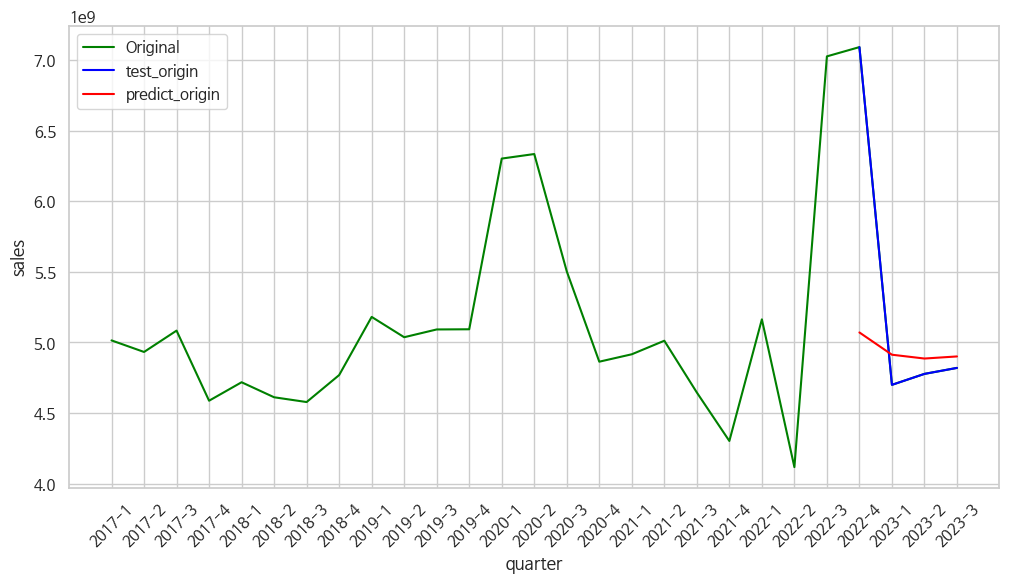

In [183]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [184]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.043970e+08
std      1.079079e+09
min     -2.132833e+08
25%     -1.348594e+08
50%     -9.494579e+07
75%      4.443106e+08
max      2.020763e+09
dtype: float64

In [185]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.23980778]]
--------------------------------------------------------------------------------
예측된 매출  : 4830760448.0 


### 성장성

In [186]:
X = ap_pills[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_pills.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   5.014822e+09 -5.392517e+07 -2.380952
1   4.932899e+09 -5.616894e+07 -5.000000
2   5.084073e+09 -5.660006e+07  2.439024
3   4.587640e+09 -6.774629e+07  0.000000
4   4.718389e+09 -6.815145e+07  2.380952
5   4.612052e+09 -6.441668e+07  0.000000
6   4.578244e+09 -6.303673e+07  2.325581
7   4.769222e+09 -6.408171e+07  0.000000
8   5.181205e+09 -2.670614e+07  0.000000
9   5.037255e+09 -2.383198e+07  2.272727
10  5.092304e+09 -3.200423e+07  2.222222
11  5.093557e+09 -8.632306e+07  6.250000
12  6.302405e+09 -9.312007e+07 -2.040816
13  6.334536e+09 -1.492156e+08  6.250000
14  5.503697e+09 -1.323580e+08  0.000000
15  4.864025e+09 -1.769792e+08  0.000000
16  4.916535e+09 -1.395408e+08  0.000000
17  5.012378e+09 -1.205829e+08  2.083333
18  4.645762e+09 -1.281435e+08  0.000000
19  4.302576e+09 -1.301747e+08 -2.127660
20  5.163788e+09 -1.321809e+08  0.000000
21  4.117506e+09 -1.521140e+08  7.843137
22  7.026158e+09 -1.184711e+08 -2.000000
23  7.091780e+09

In [187]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [188]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.22195228 0.24239341 0.37674075]
 [0.23619349 0.21828474 0.32095421]]


In [189]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [190]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [191]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0899
Epoch 1: val_loss improved from inf to 0.16047, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.0899 - val_loss: 0.1605
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0891
Epoch 2: val_loss improved from 0.16047 to 0.15994, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.0891 - val_loss: 0.1599
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0884
Epoch 3: val_loss improved from 0.15994 to 0.15941, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.0884 - val_loss: 0.1594
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0876
Epoch 4: val_loss improved from 0.15941 to 0.15889, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.0876 - val_loss: 0.1589
Epoch 5/300
1/1 [================

In [192]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 922ms/step
[[0.22403221]
 [0.20093402]
 [0.20277394]
 [0.19254906]]


In [193]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.233170,0.224032
2023-1,0.177634,0.200934
2023-2,0.183938,0.202774
2023-3,0.161001,0.192549


In [194]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 3].values       # 성장성이 ap_pills의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.233170,0.224032,1.009340,1.001033,0.008307
2023-1,0.177634,0.200934,0.958856,0.980036,-0.021180
2023-2,0.183938,0.202774,0.964586,0.981709,-0.017122
2023-3,0.161001,0.192549,0.943736,0.972414,-0.028678


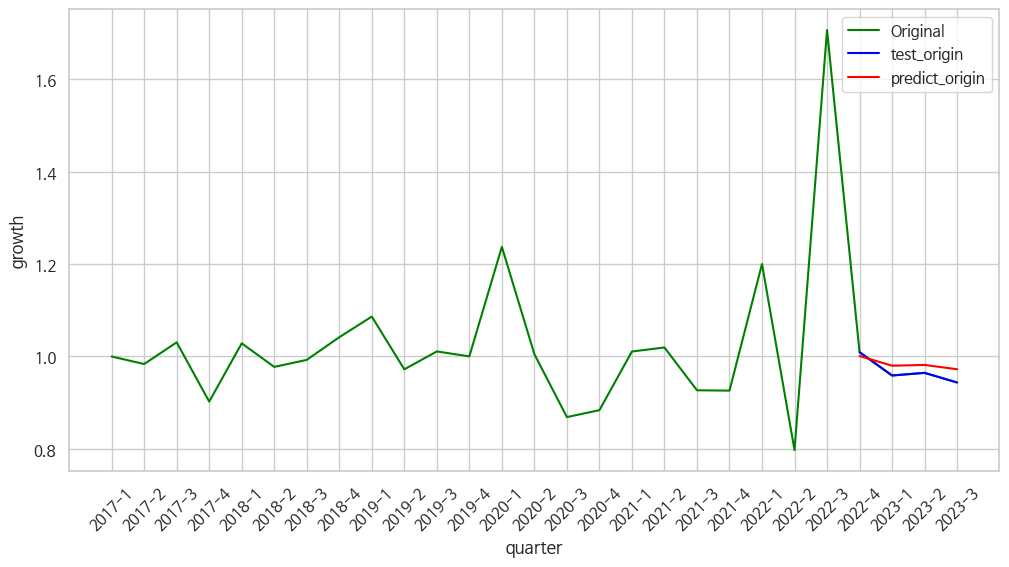

In [195]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [196]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.014668
std      0.016047
min     -0.028678
25%     -0.023055
50%     -0.019151
75%     -0.010765
max      0.008307
dtype: float64

In [197]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 27ms/step
[[0.17798564]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9591752886772156 


###시장성

In [198]:
### X / y 데이터 생성
X = ap_pills[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_pills.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   5.014822e+09  1.000000 -2.380952
1   4.932899e+09  0.983664 -5.000000
2   5.084073e+09  1.030646  2.439024
3   4.587640e+09  0.902355  0.000000
4   4.718389e+09  1.028500  2.380952
5   4.612052e+09  0.977463  0.000000
6   4.578244e+09  0.992670  2.325581
7   4.769222e+09  1.041714  0.000000
8   5.181205e+09  1.086384  0.000000
9   5.037255e+09  0.972217  2.272727
10  5.092304e+09  1.010928  2.222222
11  5.093557e+09  1.000246  6.250000
12  6.302405e+09  1.237329 -2.040816
13  6.334536e+09  1.005098  6.250000
14  5.503697e+09  0.868840  0.000000
15  4.864025e+09  0.883774  0.000000
16  4.916535e+09  1.010796  0.000000
17  5.012378e+09  1.019494  2.083333
18  4.645762e+09  0.926858  0.000000
19  4.302576e+09  0.926129 -2.127660
20  5.163788e+09  1.200162  0.000000
21  4.117506e+09  0.797381  7.843137
22  7.026158e+09  1.706411 -2.000000
23  7.091780e+09  1.009340  0.000000
24  4.700108e+09  0.958856  1.328215
25  4.777653e+09  0.964586 -0.161467
2

In [199]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [200]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.22195228 0.18393838 0.37674075]
 [0.23619349 0.16100118 0.32095421]]


In [201]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [202]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [203]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.5906
Epoch 1: val_loss improved from inf to 0.08922, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.5906 - val_loss: 0.0892
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.5891
Epoch 2: val_loss improved from 0.08922 to 0.08867, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.5891 - val_loss: 0.0887
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.5877
Epoch 3: val_loss improved from 0.08867 to 0.08812, saving model to stock_model.h5
1/1 [==============================] - 0s 131ms/step - loss: 0.5877 - val_loss: 0.0881
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.5862
Epoch 4: val_loss improved from 0.08812 to 0.08757, saving model to stock_model.h5
1/1 [==============================] - 0s 120ms/step - loss: 0.5862 - val_loss: 0.0876
Epoch 5/300
1/1 [==============

In [204]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 2s 2s/step
[[0.30319938]
 [0.28763106]
 [0.27249828]
 [0.23193054]]


In [205]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.254776,0.303199
2023-1,0.289713,0.287631
2023-2,0.242393,0.272498
2023-3,0.218285,0.231931


In [206]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 5].values       # 시장성이 ap_pills의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.254776,0.303199,-1.379610e+08,-130545072.0,-7.415976e+06
2023-1,0.289713,0.287631,-1.326104e+08,-132929320.0,3.188880e+05
2023-2,0.242393,0.272498,-1.398573e+08,-135246864.0,-4.610480e+06
2023-3,0.218285,0.231931,-1.435495e+08,-141459696.0,-2.089824e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


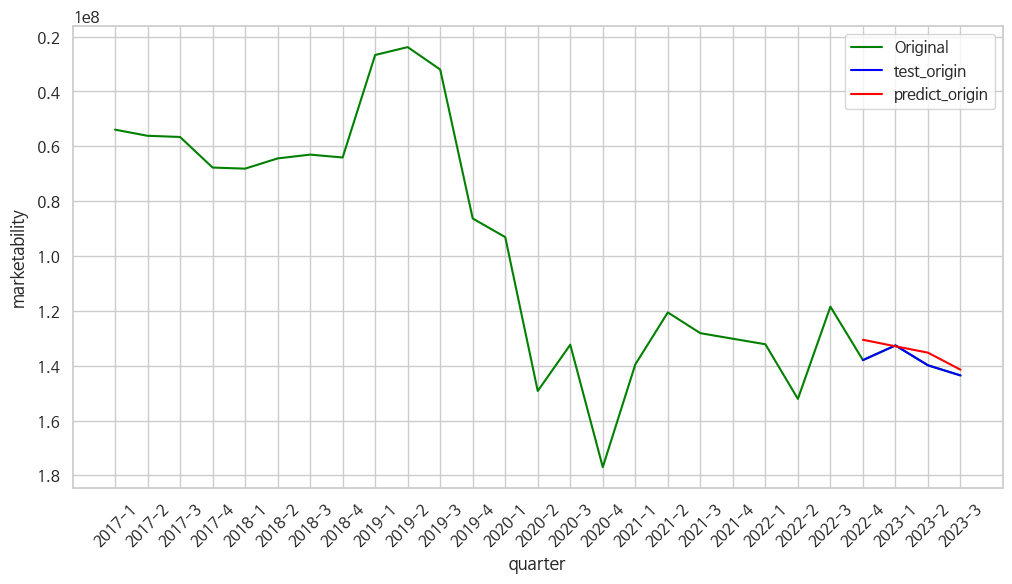

In [207]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [208]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -3.449348e+06
std      3.323165e+06
min     -7.415976e+06
25%     -5.311854e+06
50%     -3.350152e+06
75%     -1.487646e+06
max      3.188880e+05
dtype: float64

In [209]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 37ms/step
[[0.21575114]]
--------------------------------------------------------------------------------
예측된 시장성  : -143937536.0 


### 순점포증감률

In [210]:
### X / y 데이터 생성
X = ap_pills[['분기당_매출_금액', '성장성', '시장성']]
y = ap_pills.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   5.014822e+09  1.000000 -5.392517e+07
1   4.932899e+09  0.983664 -5.616894e+07
2   5.084073e+09  1.030646 -5.660006e+07
3   4.587640e+09  0.902355 -6.774629e+07
4   4.718389e+09  1.028500 -6.815145e+07
5   4.612052e+09  0.977463 -6.441668e+07
6   4.578244e+09  0.992670 -6.303673e+07
7   4.769222e+09  1.041714 -6.408171e+07
8   5.181205e+09  1.086384 -2.670614e+07
9   5.037255e+09  0.972217 -2.383198e+07
10  5.092304e+09  1.010928 -3.200423e+07
11  5.093557e+09  1.000246 -8.632306e+07
12  6.302405e+09  1.237329 -9.312007e+07
13  6.334536e+09  1.005098 -1.492156e+08
14  5.503697e+09  0.868840 -1.323580e+08
15  4.864025e+09  0.883774 -1.769792e+08
16  4.916535e+09  1.010796 -1.395408e+08
17  5.012378e+09  1.019494 -1.205829e+08
18  4.645762e+09  0.926858 -1.281435e+08
19  4.302576e+09  0.926129 -1.301747e+08
20  5.163788e+09  1.200162 -1.321809e+08
21  4.117506e+09  0.797381 -1.521140e+08
22  7.026158e+09  1.706411 -1.184711e+08
23  7.091780e+09

In [211]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [212]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.22195228 0.18393838 0.24239341]
 [0.23619349 0.16100118 0.21828474]]


In [213]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [214]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [215]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3395
Epoch 1: val_loss improved from inf to 0.25242, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3395 - val_loss: 0.2524
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3381
Epoch 2: val_loss improved from 0.25242 to 0.25164, saving model to stock_model.h5
1/1 [==============================] - 0s 109ms/step - loss: 0.3381 - val_loss: 0.2516
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3368
Epoch 3: val_loss improved from 0.25164 to 0.25086, saving model to stock_model.h5
1/1 [==============================] - 0s 122ms/step - loss: 0.3368 - val_loss: 0.2509
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3354
Epoch 4: val_loss improved from 0.25086 to 0.25008, saving model to stock_model.h5
1/1 [==============================] - 0s 125ms/step - loss: 0.3354 - val_loss: 0.2501
Epoch 5/300
1/1 [==============

In [216]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.33530033]
 [0.52158767]
 [0.40715277]
 [0.32095417]]


In [217]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.389313,0.335300
2023-1,0.492731,0.521588
2023-2,0.376741,0.407153
2023-3,0.320954,0.320954


In [218]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_pills의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.389313,0.335300,0.000000,-0.693692,6.936919e-01
2023-1,0.492731,0.521588,1.328215,1.698822,-3.706074e-01
2023-2,0.376741,0.407153,-0.161467,0.229119,-3.905857e-01
2023-3,0.320954,0.320954,-0.877941,-0.877941,4.172325e-07


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


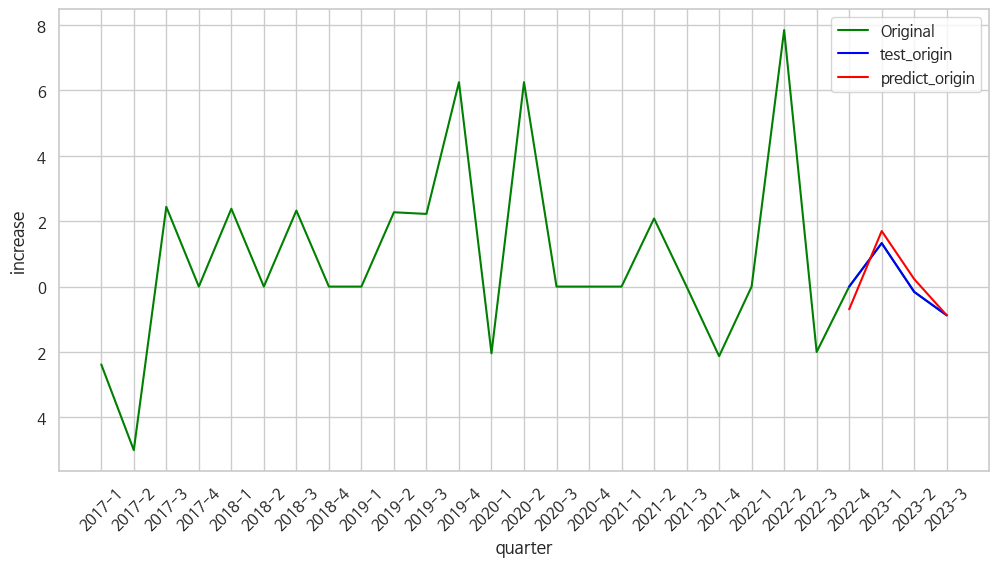

In [219]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_pills['분기'], ap_pills['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [220]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.016875
std      0.506615
min     -0.390586
25%     -0.375602
50%     -0.185303
75%      0.173423
max      0.693692
dtype: float64

In [221]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 47ms/step
[[0.3111605]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.003722906112671 


### 추가

In [222]:
ap_pills.loc[27] = ['2023-4', '의약품', sales, growth, increase, marketability]

<ipython-input-222-1222ec4e2c62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_pills.loc[27] = ['2023-4', '의약품', sales, growth, increase, marketability]


In [223]:
final_ap_pills = ap_pills
final_ap_pills

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,의약품,5.014822e+09,1.000000,-2.380952,-5.392517e+07
1,2017-2,의약품,4.932899e+09,0.983664,-5.000000,-5.616894e+07
2,2017-3,의약품,5.084073e+09,1.030646,2.439024,-5.660006e+07
3,2017-4,의약품,4.587640e+09,0.902355,0.000000,-6.774629e+07
4,2018-1,의약품,4.718389e+09,1.028500,2.380952,-6.815145e+07
5,2018-2,의약품,4.612052e+09,0.977463,0.000000,-6.441668e+07
6,2018-3,의약품,4.578244e+09,0.992670,2.325581,-6.303673e+07
7,2018-4,의약품,4.769222e+09,1.041714,0.000000,-6.408171e+07
8,2019-1,의약품,5.181205e+09,1.086384,0.000000,-2.670614e+07
9,2019-2,의약품,5.037255e+09,0.972217,2.272727,-2.383198e+07


## 최종결과

In [224]:
### X / y 데이터 생성
X = ap_pills[['성장성', '시장성', '순점포증감률']]
y = ap_pills.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -5.392517e+07 -2.380952
1   0.983664 -5.616894e+07 -5.000000
2   1.030646 -5.660006e+07  2.439024
3   0.902355 -6.774629e+07  0.000000
4   1.028500 -6.815145e+07  2.380952
5   0.977463 -6.441668e+07  0.000000
6   0.992670 -6.303673e+07  2.325581
7   1.041714 -6.408171e+07  0.000000
8   1.086384 -2.670614e+07  0.000000
9   0.972217 -2.383198e+07  2.272727
10  1.010928 -3.200423e+07  2.222222
11  1.000246 -8.632306e+07  6.250000
12  1.237329 -9.312007e+07 -2.040816
13  1.005098 -1.492156e+08  6.250000
14  0.868840 -1.323580e+08  0.000000
15  0.883774 -1.769792e+08  0.000000
16  1.010796 -1.395408e+08  0.000000
17  1.019494 -1.205829e+08  2.083333
18  0.926858 -1.281435e+08  0.000000
19  0.926129 -1.301747e+08 -2.127660
20  1.200162 -1.321809e+08  0.000000
21  0.797381 -1.521140e+08  7.843137
22  1.706411 -1.184711e+08 -2.000000
23  1.009340 -1.379610e+08  0.000000
24  0.958856 -1.326104e+08  1.328215
25  0.964586 -1.398573e+08 -0.161467
2

In [225]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [226]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.16100118 0.21828474 0.32095421]
 [0.17798565 0.21575113 0.31116051]]


In [227]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [228]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [229]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1821
Epoch 1: val_loss improved from inf to 0.27270, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.1821 - val_loss: 0.2727
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1812
Epoch 2: val_loss improved from 0.27270 to 0.27194, saving model to stock_model.h5
1/1 [==============================] - 0s 125ms/step - loss: 0.1812 - val_loss: 0.2719
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1802
Epoch 3: val_loss improved from 0.27194 to 0.27119, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.1802 - val_loss: 0.2712
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1792
Epoch 4: val_loss improved from 0.27119 to 0.27044, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.1792 - val_loss: 0.2704
Epoch 5/300
1/1 [==============

In [230]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 3s 3s/step
[[0.29356852]
 [0.2721423 ]
 [0.27652213]
 [0.25195727]]


In [231]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.195880,0.293569
2023-2,0.221952,0.272142
2023-3,0.236193,0.276522
2023-4,0.239808,0.251957


In [232]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_pills.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_pills의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.195880,0.293569,4.700108e+09,4.990660e+09,-290551296.0
2023-2,0.221952,0.272142,4.777653e+09,4.926932e+09,-149278720.0
2023-3,0.236193,0.276522,4.820010e+09,4.939959e+09,-119948800.0
2023-4,0.239808,0.251957,4.830760e+09,4.866896e+09,-36135936.0


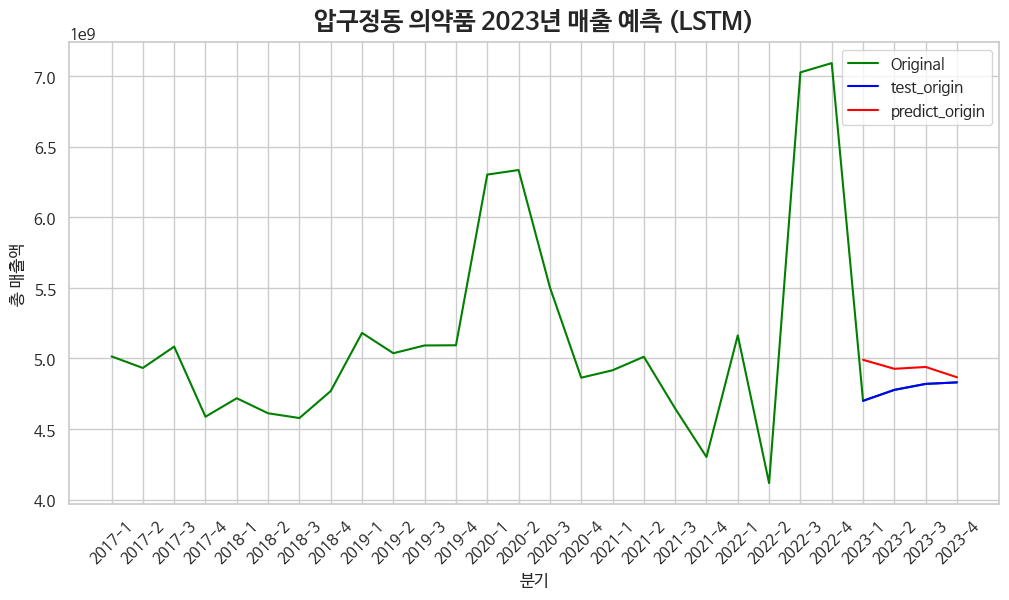

In [233]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('압구정동 의약품 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)


plt.plot(ap_pills['분기'], ap_pills['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()